## BASIC EXPLORATION

In [1]:
import numpy as np 
import pandas as pd

In [2]:
#loading the dataset as loan dataset
loan=pd.read_csv('train.csv',encoding='latin')


In [3]:
#lets print the data
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
#lets drop Loan_ID
columns_notneeded=['Loan_ID']
loan=loan.drop(columns_notneeded,axis=1)

In [7]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
loan.shape

(614, 12)

In [9]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## MISSING VALUE TREATMENT

In [10]:
#lets treat missing value
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#interpolating all the numeric variables with missing values
loan['Gender']=loan['Gender'].interpolate(method='ffill')
loan['Married']=loan['Married'].interpolate(method='ffill')
loan['Dependents']=loan['Dependents'].interpolate(method='ffill')
loan['Self_Employed']=loan['Self_Employed'].interpolate(method='ffill')
loan['LoanAmount']=loan['LoanAmount'].interpolate(method='linear')
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].interpolate(method='ffill')
loan['Credit_History']=loan['Credit_History'].interpolate(method='ffill')

In [12]:
loan=loan.dropna()

In [13]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## VISUALISE TARGET VARIABLE

In [14]:
#lets see the targer variable trend
group_loanstatus=loan.groupby('Loan_Status').size()

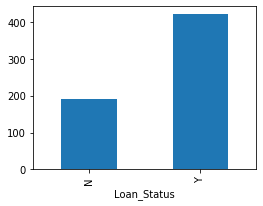

In [15]:
#plot the chart
%matplotlib inline
group_loanstatus.plot(kind='bar',figsize=(4,3))
#here we can see loan status is yes in most cases

## CONTINIOUS PREDICTORS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AF6198B88>,
      dtype=object)

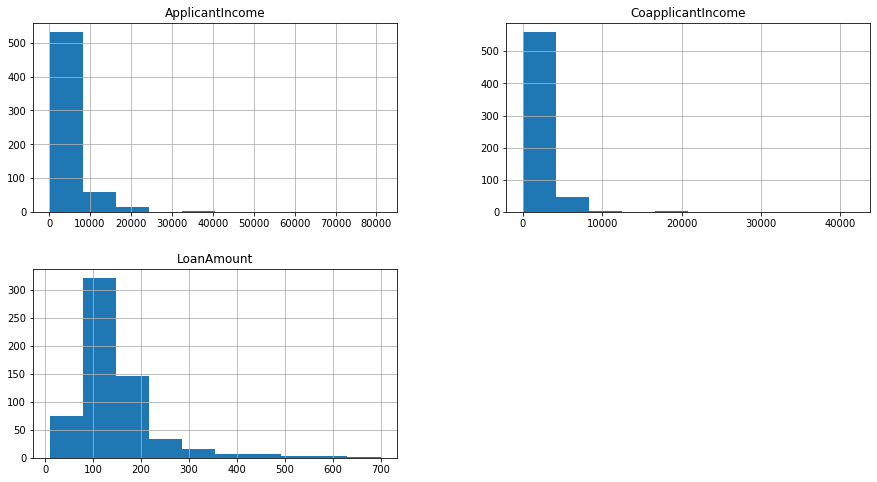

In [16]:
#lets plot all the continious predictors in the data
loan.hist(['ApplicantIncome','CoapplicantIncome','LoanAmount'], figsize=(15,8))
#we can see in ApplicantIncome & CoapplicantIncome there are some outlier but not much

## CATEGORICAL PREDICTORS

In [17]:
#lets plot all the categorical predictors in the data
#lets write a function to plot all the charts in one go
def plotcharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(28,7))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

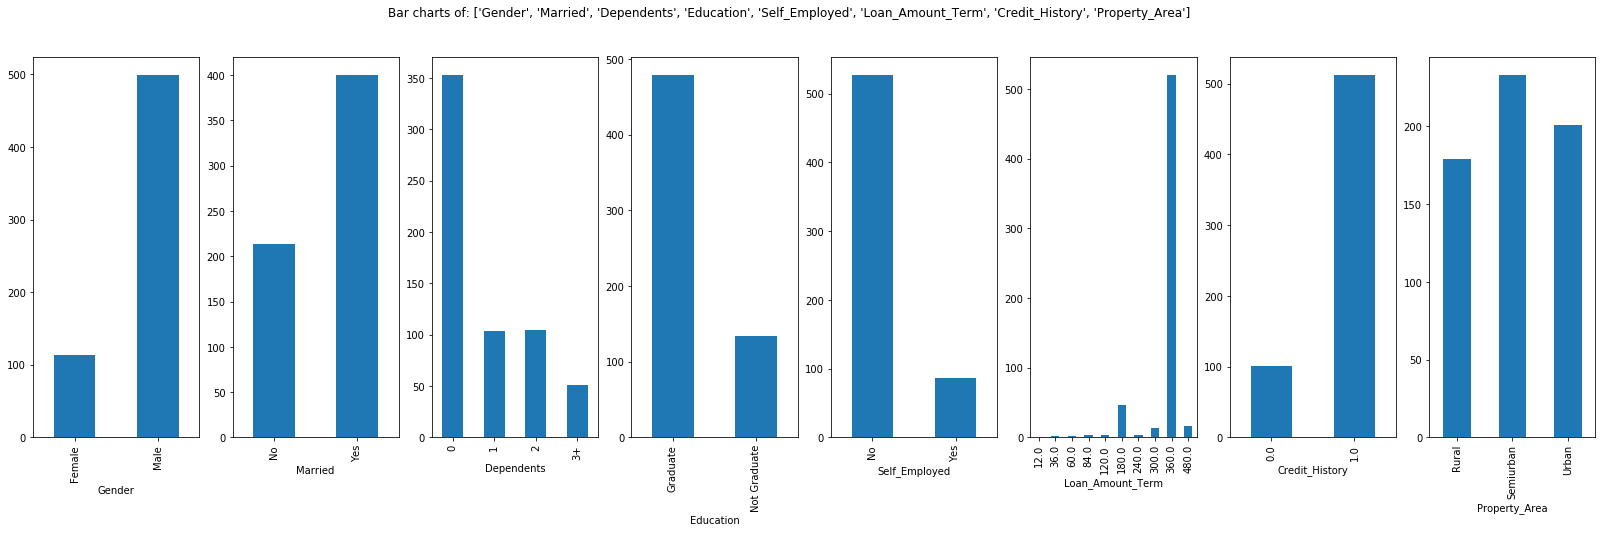

In [18]:
#lets plot the data
plotcharts(inpData=loan, colsToPlot=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

## CONTINIOUS V TARGET VISUALISATION

In [19]:
#lets see the relation between target variable and other continious variables
groupbyloanstatus=loan.groupby(['Loan_Status'])
groupbyloanstatus.mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,152.239583,344.875000,0.546875
Y,5382.964371,1508.090071,144.485748,340.104513,0.966746


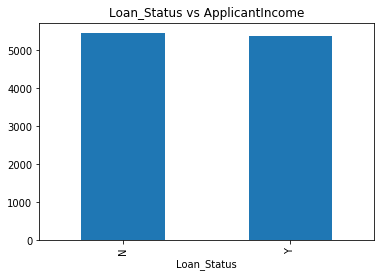

In [20]:
#Loan_Status vs ApplicantIncome
#bar plot
groupbyloanstatus.mean()['ApplicantIncome'].plot(kind='bar', title='Loan_Status vs ApplicantIncome')

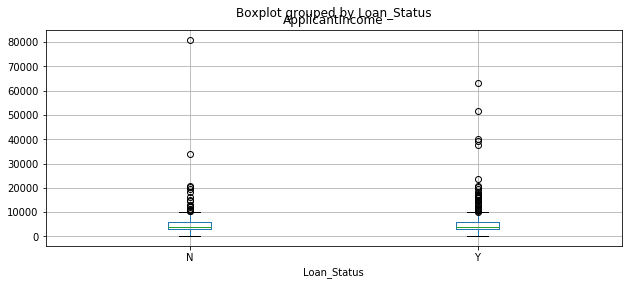

In [21]:
#box plot
loan.boxplot(column='ApplicantIncome', by='Loan_Status', figsize=(10,4), vert=True)

In [22]:
#we can see here some outliers for ApplicantIncome
loan[loan['ApplicantIncome']>45000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [23]:
#lets treat these values
loan['ApplicantIncome'][loan['ApplicantIncome']>45000]=40000

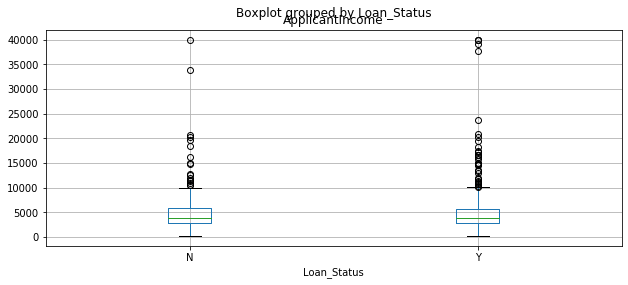

In [24]:
#lets see now
loan.boxplot(column='ApplicantIncome', by='Loan_Status', figsize=(10,4), vert=True)

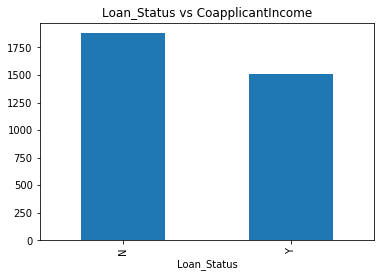

In [25]:
#Loan_Status vs CoapplicantIncome
groupbyloanstatus.mean()['CoapplicantIncome'].plot(kind='bar', title='Loan_Status vs CoapplicantIncome')

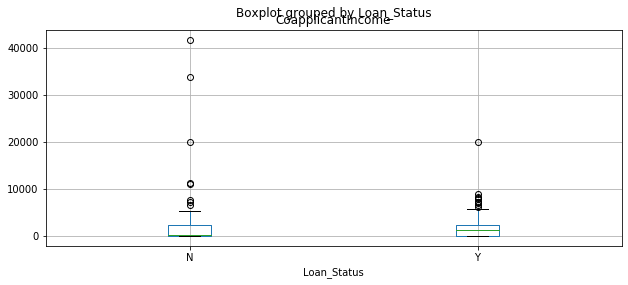

In [26]:
#box plot
loan.boxplot(column='CoapplicantIncome', by='Loan_Status', figsize=(10,4), vert=True)

In [27]:
#we can see here some outliers for CoapplicantIncome
loan[loan['CoapplicantIncome']>15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N


In [28]:
#lets treat these values
loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000]=10000

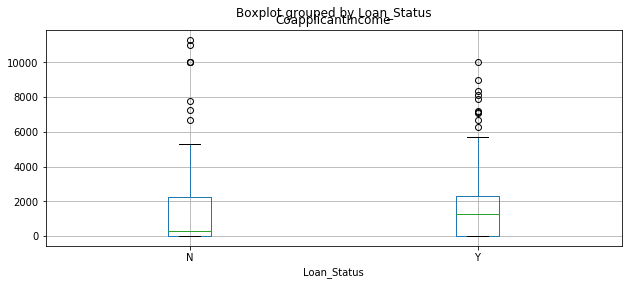

In [29]:
#box plot
loan.boxplot(column='CoapplicantIncome', by='Loan_Status', figsize=(10,4), vert=True)

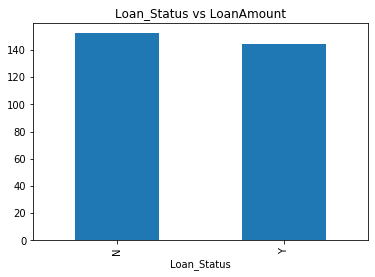

In [30]:
#Loan_Status vs LoanAmount
groupbyloanstatus.mean()['LoanAmount'].plot(kind='bar', title='Loan_Status vs LoanAmount')

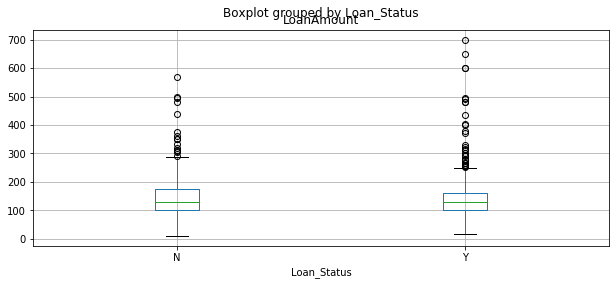

In [31]:
#box plot
loan.boxplot(column='LoanAmount', by='Loan_Status', figsize=(10,4), vert=True)

## ANOVA TEST

In [32]:
#lets do anova test
from scipy.stats import f_oneway
def FunctionAnova(inputdata, Targetvariable, Continiousvariable):
    for Continious in Continiousvariable:
        Loan_Status_0=inputdata[Continious][inputdata[Targetvariable]==0]
        Loan_Status_1=inputdata[Continious][inputdata[Targetvariable]==1]
        AnovaResults = f_oneway(Loan_Status_0, Loan_Status_1)
        print("P-Value for Anova Test of:", Continious, AnovaResults[1])

In [33]:
#print anova results for all categorical variables
FunctionAnova(inputdata = loan, Targetvariable = 'Loan_Status', Continiousvariable = ['ApplicantIncome','CoapplicantIncome','LoanAmount'])

P-Value for Anova Test of: ApplicantIncome nan
P-Value for Anova Test of: CoapplicantIncome nan
P-Value for Anova Test of: LoanAmount nan


C:\Users\proje\Anaconda3\lib\site-packages\scipy\stats\stats.py:3333: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
C:\Users\proje\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\proje\Anaconda3\lib\site-packages\scipy\stats\stats.py:3336: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / bign)
C:\Users\proje\Anaconda3\lib\site-packages\scipy\stats\stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)
C:\Users\proje\Anaconda3\lib\site-packages\scipy\stats\stats.py:3343: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= _square_of_sums(alldata) / bign


## CATEGORICAL V TARGET VISUALISATION

In [34]:
#gender v loan_status
CrossTabgender=pd.crosstab(index=loan['Gender'], columns=loan['Loan_Status'])
CrossTabgender

Loan_Status,N,Y
Gender,,
Female,37,77
Male,155,344


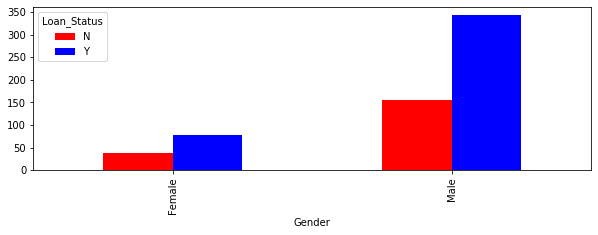

In [35]:
# Visual Inference using Grouped Bar chart
CrossTabgender.plot.bar(figsize=(10,3), color=['red','blue'])

In [36]:
#married v loan_status
CrossTabmarried=pd.crosstab(index=loan['Married'], columns=loan['Loan_Status'])
CrossTabgender

Loan_Status,N,Y
Gender,,
Female,37,77
Male,155,344


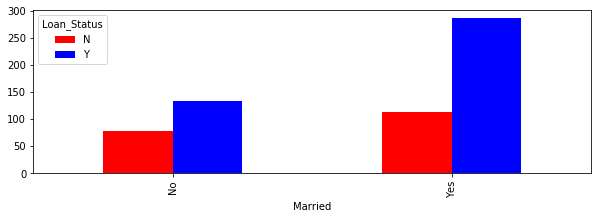

In [37]:
# Visual Inference using Grouped Bar chart
CrossTabmarried.plot.bar(figsize=(10,3), color=['red','blue'])

In [38]:
#Dependents vs Loan_Status
CrossTabDependents=pd.crosstab(index=loan['Dependents'], columns=loan['Loan_Status'])
CrossTabDependents

Loan_Status,N,Y
Dependents,,
0,109,244
1,37,67
2,28,77
3+,18,33


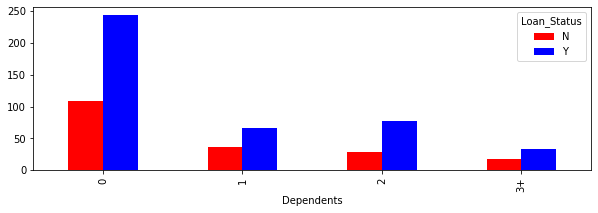

In [39]:
# Visual Inference using Grouped Bar chart
CrossTabDependents.plot.bar(figsize=(10,3), color=['red','blue'])

In [40]:
#Education vs Loan_Status
CrossTabeducation=pd.crosstab(index=loan['Education'], columns=loan['Loan_Status'])
CrossTabeducation

Loan_Status,N,Y
Education,,
Graduate,140,339
Not Graduate,52,82


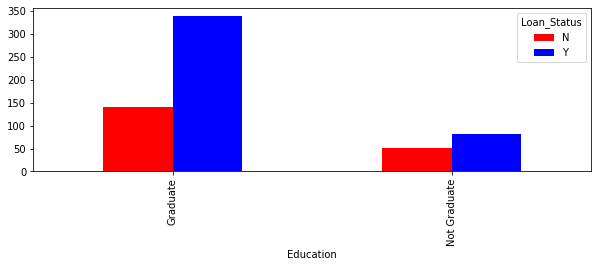

In [41]:
# Visual Inference using Grouped Bar chart
CrossTabeducation.plot.bar(figsize=(10,3), color=['red','blue'])

In [42]:
#Self_Employed vs Loan_Status
CrossTabselfemployed=pd.crosstab(index=loan['Self_Employed'], columns=loan['Loan_Status'])
CrossTabselfemployed

Loan_Status,N,Y
Self_Employed,,
No,166,361
Yes,26,60


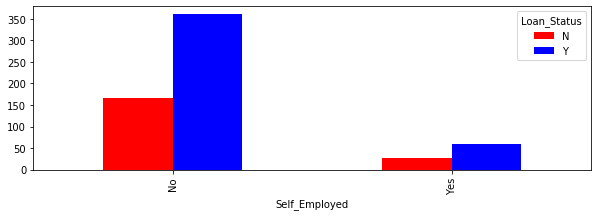

In [43]:
# Visual Inference using Grouped Bar chart
CrossTabselfemployed.plot.bar(figsize=(10,3), color=['red','blue'])

In [44]:
#Loan_Amount_Term vs Loan_Status
CrossTablat=pd.crosstab(index=loan['Loan_Amount_Term'], columns=loan['Loan_Status'])
CrossTablat

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,32
240.0,1,3
300.0,6,8
360.0,157,363


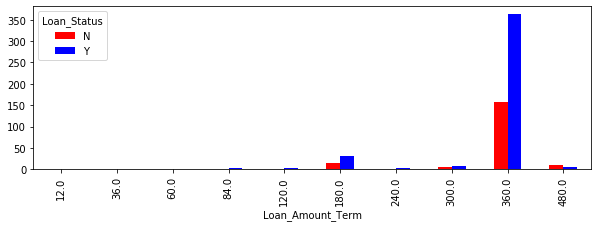

In [45]:
# Visual Inference using Grouped Bar chart
CrossTablat.plot.bar(figsize=(10,3), color=['red','blue'])

In [46]:
#Credit_History vs Loan_Status
CrossTabch=pd.crosstab(index=loan['Credit_History'], columns=loan['Loan_Status'])
CrossTabch

Loan_Status,N,Y
Credit_History,,
0.0,87,14
1.0,105,407


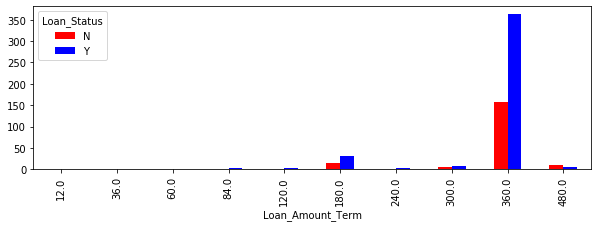

In [47]:
# Visual Inference using Grouped Bar chart
CrossTablat.plot.bar(figsize=(10,3), color=['red','blue'])

In [48]:
#Property_Area vs Loan_Status
CrossTabpa=pd.crosstab(index=loan['Property_Area'], columns=loan['Loan_Status'])
CrossTabpa

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,132


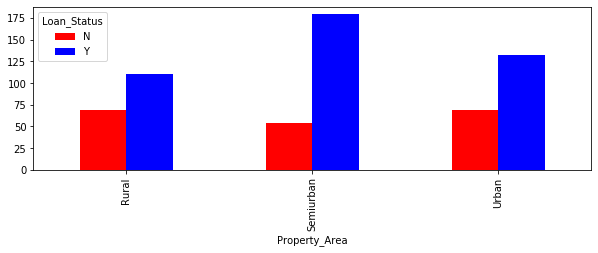

In [49]:
# Visual Inference using Grouped Bar chart
CrossTabpa.plot.bar(figsize=(10,3), color=['red','blue'])

## CHI-SQ TEST

In [50]:
# CREATE FunctionChi_sq TO GET Chi_sq TEST VALUE
from scipy.stats import chi2_contingency
def FunctionChi_sq(inputdata, Targetvariable, Categoricalvariable):
    for category in Categoricalvariable:
        ChiSqResult = chi2_contingency(pd.crosstab(index=inputdata[category], columns=inputdata[Targetvariable]))
        print('The P-Value of the ChiSq Test is:', category, ChiSqResult[1])

In [51]:
#print anova results for all categorical variables
FunctionChi_sq(inputdata = loan, Targetvariable = 'Loan_Status', Categoricalvariable = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

The P-Value of the ChiSq Test is: Gender 0.8590127899396094
The P-Value of the ChiSq Test is: Married 0.031131052959917485
The P-Value of the ChiSq Test is: Dependents 0.5049869647207268
The P-Value of the ChiSq Test is: Education 0.04465356518805114
The P-Value of the ChiSq Test is: Self_Employed 0.9128671496516636
The P-Value of the ChiSq Test is: Loan_Amount_Term 0.07380690561791242
The P-Value of the ChiSq Test is: Credit_History 5.864581757721883e-38
The P-Value of the ChiSq Test is: Property_Area 0.0020534018465575765


## CREATE DUMMY COLUMNS

In [52]:
# Treating nominal variable Sex first, as it is a binary variable.
loan['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [53]:
#lets create dummy columns for applying algos
loannumeric=pd.get_dummies(loan)
loannumeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1


## save as pkl and csv file

In [54]:
loannumeric.to_pickle('loannumeric.pkl')
loannumeric.to_csv('loannumeric.csv')

In [55]:
loannumeric.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## SPLIT THE DATA

In [56]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

X=loannumeric[Predictors].values
y=loannumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 20)
(429,)
(184, 20)
(184,)


## logistic regression


In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head(10)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.87      0.36      0.51        56
           1       0.78      0.98      0.87       128

    accuracy                           0.79       184
   macro avg       0.82      0.67      0.69       184
weighted avg       0.80      0.79      0.76       184

[[ 20  36]
 [  3 125]]
Accuracy of the model: 0.76


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
5,9323.0,0.0,75.0,180.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
6,3189.0,2598.0,120.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1,1
7,4600.0,0.0,73.0,180.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
8,2875.0,1750.0,105.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1,1
9,33846.0,0.0,260.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1


In [59]:
print(metrics.classification_report(y_test, prediction).split()[-2])

0.76


### Decision tree


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.73      0.34      0.46        56
           1       0.77      0.95      0.85       128

    accuracy                           0.76       184
   macro avg       0.75      0.64      0.65       184
weighted avg       0.76      0.76      0.73       184

[[ 19  37]
 [  7 121]]
Accuracy of the model: 0.73


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


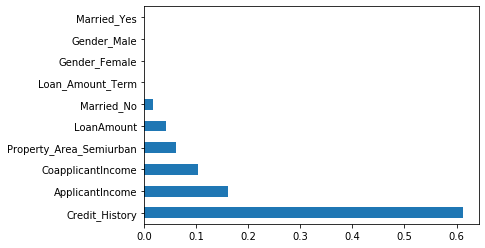

In [60]:
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction

TestingDataResults.head()

In [61]:
!pip install dtreeplot

ERROR: Could not find a version that satisfies the requirement dtreeplot (from versions: none)
ERROR: No matching distribution found for dtreeplot


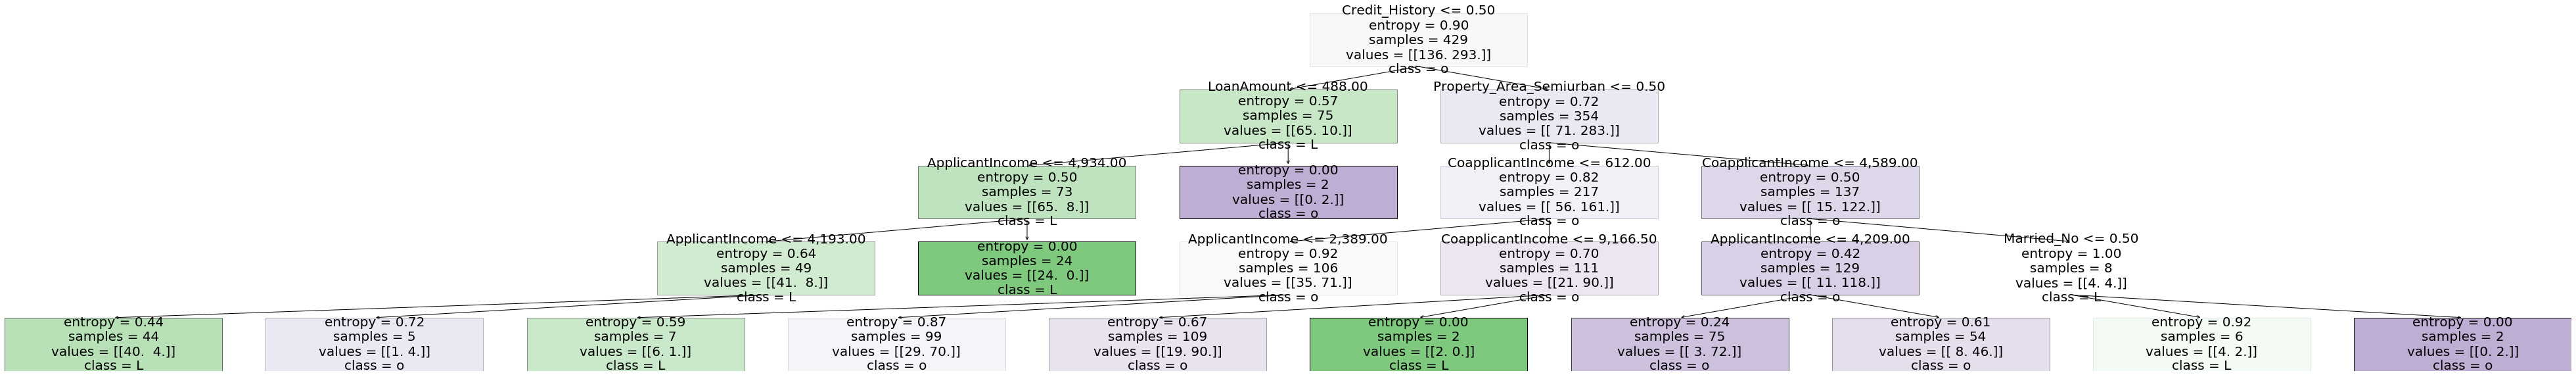

In [62]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt

# Plotting the decision tree
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Get current figure and change its size
currentFigure=plt.gcf()
currentFigure.set_size_inches(70,10)

### RANDOM FOREST

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.39      0.54        56
           1       0.78      0.97      0.87       128

    accuracy                           0.79       184
   macro avg       0.82      0.68      0.70       184
weighted avg       0.80      0.79      0.77       184

[[ 22  34]
 [  4 124]]
Accuracy of the model: 0.77


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


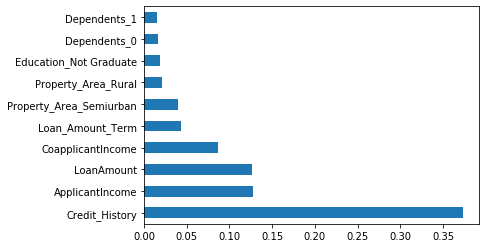

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, n_estimators=200,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

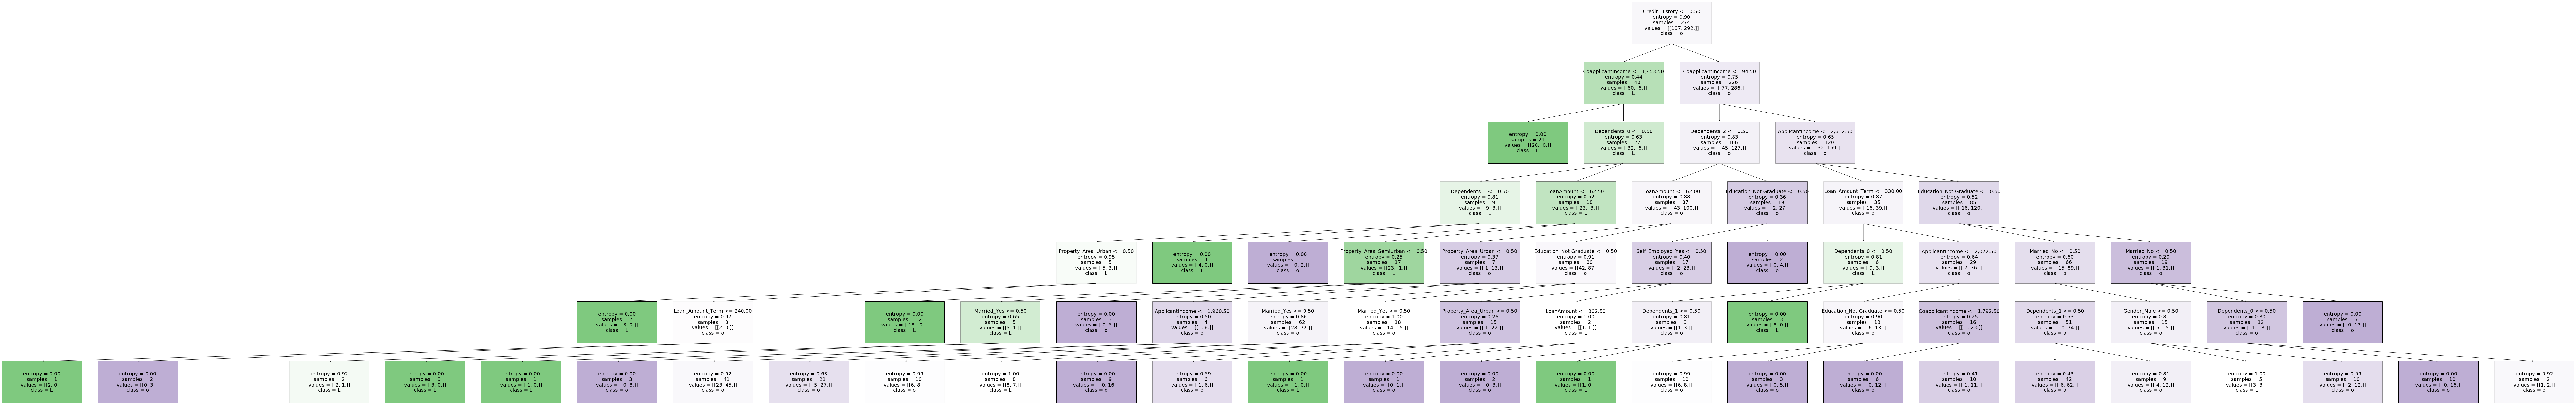

In [64]:
# PLotting Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

### AdaBoost


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


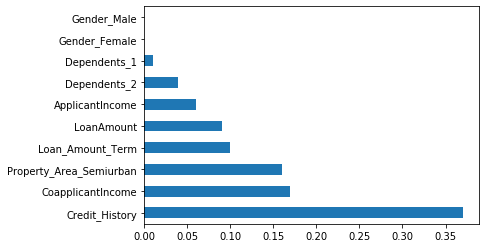

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.06)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting decision trees from AdaBoost

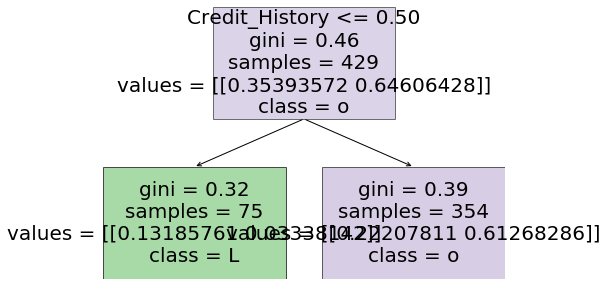

In [93]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

### XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
              precision    recall  f1-score   support

           0       0.85      0.39      0.54        56
           1       0.78      0.97      0.87       128

    accuracy                           0.79       184
   macro avg       0.82      0.68      0.70       184
weighted avg       0.80      0.79      0.77       184

[[ 22  34]


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


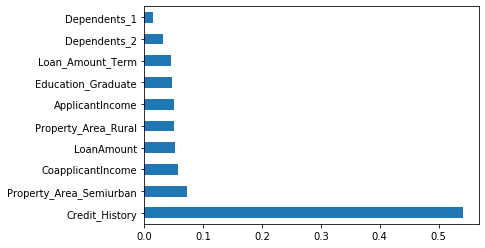

In [88]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

### Plotting decision tree out of XG Boost

In [89]:
# Adding graphviz path to the PATH env variable
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\proje\\Anaconda3\\Library\\bin\\graphviz'

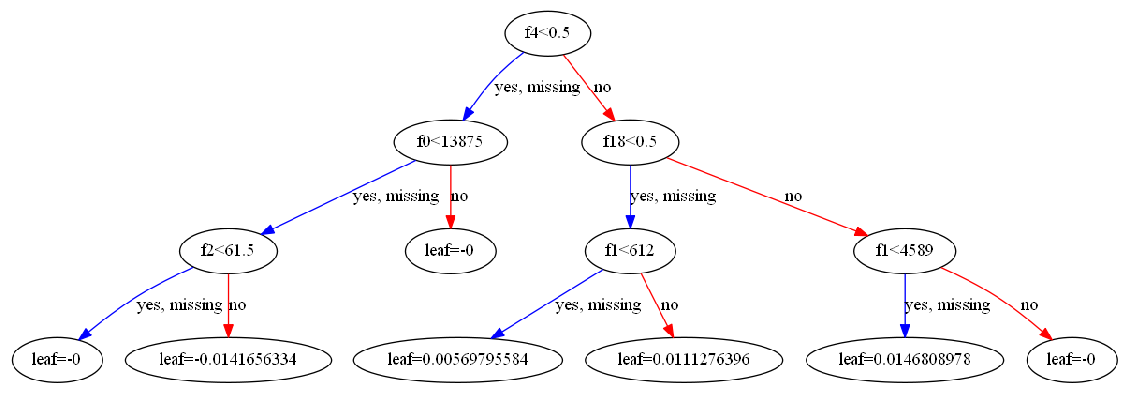

In [90]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

### KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=8)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.33      0.18      0.23        56
           1       0.70      0.84      0.77       128

    accuracy                           0.64       184
   macro avg       0.52      0.51      0.50       184
weighted avg       0.59      0.64      0.60       184

[[ 10  46]
 [ 20 108]]
Accuracy of the model: 0.60


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


### SVM

In [78]:
from sklearn import svm
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.80      0.07      0.13        56
           1       0.71      0.99      0.83       128

    accuracy                           0.71       184
   macro avg       0.75      0.53      0.48       184
weighted avg       0.74      0.71      0.62       184

[[  4  52]
 [  1 127]]
Accuracy of the model: 0.62


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.82      0.41      0.55        56
           1       0.79      0.96      0.87       128

    accuracy                           0.79       184
   macro avg       0.80      0.69      0.71       184
weighted avg       0.80      0.79      0.77       184

[[ 23  33]
 [  5 123]]
Accuracy of the model: 0.77


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TargetColumn,PredictedLoan_Status
0,5185.0,0.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
1,13650.0,0.0,154.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
2,2718.0,0.0,70.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,3100.0,1400.0,113.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
4,4106.0,0.0,40.0,180.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


In [1]:
!pip install flask